<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-Packages" data-toc-modified-id="Loading-Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading Packages</a></span></li><li><span><a href="#Genetic-Distance" data-toc-modified-id="Genetic-Distance-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Genetic Distance</a></span></li><li><span><a href="#FPKM-Normalization-Preparation" data-toc-modified-id="FPKM-Normalization-Preparation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>FPKM Normalization Preparation</a></span><ul class="toc-item"><li><span><a href="#Acquiring-Gene-Lengths" data-toc-modified-id="Acquiring-Gene-Lengths-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Acquiring Gene Lengths</a></span></li><li><span><a href="#Function---FPKM" data-toc-modified-id="Function---FPKM-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Function - FPKM</a></span></li><li><span><a href="#FPKM-Normalized-Genes" data-toc-modified-id="FPKM-Normalized-Genes-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>FPKM Normalized Genes</a></span></li></ul></li><li><span><a href="#SynChro---Orthologous-Genes" data-toc-modified-id="SynChro---Orthologous-Genes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>SynChro - Orthologous Genes</a></span><ul class="toc-item"><li><span><a href="#Orthologous-Genes-using--C.-reinhardtii--as-the-index" data-toc-modified-id="Orthologous-Genes-using--C.-reinhardtii--as-the-index-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Orthologous Genes using <i> C. reinhardtii </i> as the index</a></span></li><li><span><a href="#Orthologous-Genes-without-a-reference-index" data-toc-modified-id="Orthologous-Genes-without-a-reference-index-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Orthologous Genes without a reference index</a></span></li></ul></li><li><span><a href="#Functions---TMM-&amp;-ED" data-toc-modified-id="Functions---TMM-&amp;-ED-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Functions - TMM &amp; ED</a></span><ul class="toc-item"><li><span><a href="#Trimmed-Mean-of-M-values-Normalization" data-toc-modified-id="Trimmed-Mean-of-M-values-Normalization-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Trimmed Mean of M-values Normalization</a></span></li><li><span><a href="#Calculating-Expression-Divergence" data-toc-modified-id="Calculating-Expression-Divergence-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Calculating Expression Divergence</a></span></li></ul></li><li><span><a href="#Expression-Divergence-Analysis" data-toc-modified-id="Expression-Divergence-Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Expression Divergence Analysis</a></span><ul class="toc-item"><li><span><a href="#Calculating--C.-reinhardtii--reference-read-counts" data-toc-modified-id="Calculating--C.-reinhardtii--reference-read-counts-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Calculating <i> C. reinhardtii </i> reference read counts</a></span></li><li><span><a href="#Correlation-of-Expression-Diversity-between-subpopulations-(i.e.,-NA1-&amp;-NA2)" data-toc-modified-id="Correlation-of-Expression-Diversity-between-subpopulations-(i.e.,-NA1-&amp;-NA2)-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Correlation of Expression Diversity between subpopulations (i.e., NA1 &amp; NA2)</a></span></li><li><span><a href="#Correlation-of-Expression-Counts-Between-Chlamydomonas-Species" data-toc-modified-id="Correlation-of-Expression-Counts-Between-Chlamydomonas-Species-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Correlation of Expression Counts Between <i>Chlamydomonas</i> Species</a></span></li><li><span><a href="#C.-reinhardtii:-Mutational-Variance-and-Genetic-Variance" data-toc-modified-id="C.-reinhardtii:-Mutational-Variance-and-Genetic-Variance-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>C. reinhardtii: Mutational Variance and Genetic Variance</a></span></li><li><span><a href="#Mantel-Test:-Genetic-Divergence-vs-Expression-Divergence" data-toc-modified-id="Mantel-Test:-Genetic-Divergence-vs-Expression-Divergence-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Mantel Test: Genetic Divergence vs Expression Divergence</a></span></li></ul></li><li><span><a href="#1:1:1:1:1-Orthologous-Genes" data-toc-modified-id="1:1:1:1:1-Orthologous-Genes-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>1:1:1:1:1 Orthologous Genes</a></span></li></ul></div>

# Loading Packages 

In [1]:
import json
import math
import scipy
import conorm
import mantel
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import random
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.figure import Figure
from matplotlib.ticker import MaxNLocator
from matplotlib.gridspec import GridSpec
from scipy import stats
import scipy.stats
from scipy.stats import mannwhitneyu
stats.junk = lambda chisq, df: stats.chi2.sf(chisq, df)
import csv
import gffpandas.gffpandas as gffpd
import sklearn
from sklearn.metrics import r2_score
import os, re
import statistics
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from itertools import combinations
%load_ext rpy2.ipython

# Genetic Distance

In [2]:
genetic_distance = pd.DataFrame()
directory = '/research/projects/chlamydomonas/NIexpression/data/orthologs/'
 
for filename in os.listdir(directory):
    if re.findall('.out.txt', filename):
        f = os.path.join(directory, filename)
        data = pd.read_csv(f, delimiter = '\t')
        for i in ['k0', 'k4', 'sites']:
            data.loc[data[i].isin(['None']), i] = np.nan
        data = data.astype({'k0': float, 'k4': float, 'sites': float})
        data = data.loc[data['k0'] < 0.60] ### Cut off for two sequences that are different over 60% at nonsynonymous sites
        genetic_distance.loc[filename[11:20], ['k0', 'k4']] = data[['k0', 'k4']].mean(axis = 0)
        genetic_distance.loc[filename[11:20], 'k0/k4'] = genetic_distance.loc[filename[11:20], 'k0']/genetic_distance.loc[filename[11:20], 'k4']
        
#         plt.figure()
#         plt.title(filename[:-8])
#         sns.histplot(data['k0'])
#         sns.histplot(data['k4'], color = 'red')
        
genetic_distance

,k0,k4,k0/k4
CREN_CSCH,0.127287,0.531477,0.239497
CREN_MALA,0.131022,0.579782,0.225985
CREN_JG05,0.110862,0.438976,0.252545
MALA_JG05,0.124471,0.535111,0.232607
CINC_MALA,0.124766,0.521104,0.239426
CINC_CSCH,0.121313,0.473660,0.256118
CSCH_MALA,0.071286,0.313863,0.227125
CINC_JG05,0.102178,0.374451,0.272874
CSCH_JG05,0.118914,0.477363,0.249106
CREN_CINC,0.106108,0.402379,0.263702


# FPKM Normalization Preparation

## Acquiring Gene Lengths

In [3]:
#### C. reinhardtii ####
name = ['seqid', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes']
CREN = pd.read_csv('/research/references/chlamydomonas/6.1_chlamy/annotation/CreinhardtiiCC_4532_707_v6.1.gene_exons.gff3', skiprows=6, delimiter = '\t', names = name)
CREN = CREN.loc[CREN['type'] == 'exon']
CREN['attributes'] = CREN['attributes'].str.split(';', expand = True)[1].str.replace('Parent=', '')
CREN['attributes'] = CREN['attributes'].str.split('_4532', expand = True)[0]
CREN = CREN.drop_duplicates(keep = 'first')
CREN['length'] = CREN['end'] - CREN['start']
fragment_length = pd.DataFrame(CREN.groupby(['attributes'])['length'].sum())
fragment_length.reset_index(inplace = True)
fragment_length.columns = ['geneid', 'length']
fragment_length.to_csv('/research/projects/chlamydomonas/NIexpression/data/fragment_length/Creinhardtii.txt', sep = '\t', index = False, header = True)

#### C. malaysian ####
name = ['chr', 'prediction', 'type', 'start', 'end', 'extra1', 'sens', 'extra2', 'attributes']
MALA = pd.read_csv('/research/references/chlamydomonas/Cmalay.v1/Cmalay.v1.genome_w_organelles.gtf', delimiter = '\t', names = name, skiprows = 1)
MALA = MALA.loc[MALA['type'] == 'exon']
MALA['attributes'] = MALA['attributes'].str.split('Parent=', expand = True)[1].str.split('.t[0-9]', expand = True)[0]
MALA = MALA.drop_duplicates(keep = 'first')
MALA['length'] = MALA['end'] - MALA['start']
fragment_length = pd.DataFrame(MALA.groupby(['attributes'])['length'].sum())
fragment_length.reset_index(inplace = True)
fragment_length.columns = ['geneid', 'length']
fragment_length.to_csv('/research/projects/chlamydomonas/NIexpression/data/fragment_length/Cmalaysian.txt', sep = '\t', index = False, header = True)

#### JG5-1 ####
name = ['chr', 'prediction', 'type', 'start', 'end', 'extra1', 'sens', 'extra2', 'attributes']
JG5 = pd.read_csv('/research/references/chlamydomonas/JG5.v1/JG5.v1.genome_w_organelles.gtf', delimiter = '\t', names = name, skiprows = 1)
JG5 = JG5.loc[JG5['type'] == 'exon']
JG5['attributes'] = JG5['attributes'].str.split('Parent=', expand = True)[1].str.split('.t[0-9]', expand = True)[0]
JG5 = JG5.drop_duplicates(keep = 'first')
JG5['length'] = JG5['end'] - JG5['start']
fragment_length = pd.DataFrame(JG5.groupby(['attributes'])['length'].sum())
fragment_length.reset_index(inplace = True)
fragment_length.columns = ['geneid', 'length']
fragment_length['geneid'] = fragment_length['geneid'].str.split(';', expand = True)[0]
fragment_length.to_csv('/research/projects/chlamydomonas/NIexpression/data/fragment_length/JG5-1.txt', sep = '\t', index = False, header = True)

#### C. incerta ####
names = ['chr', 'prediction', 'type', 'start', 'end', 'extra1', 'sens', 'extra2', 'attributes']
CINC = pd.read_csv('/research/projects/chlamydomonas/Cincerta_deNovo/analysis/assembly_V3/final_assemblies_annotations/Chlamydomonas_incerta/Chlamydomonas_incerta.braker2.gff3', delimiter = '\t', names = names)
CINC = CINC.loc[CINC['type'] == 'exon']
CINC['attributes'] = CINC['attributes'].str.split(';', expand = True)[1].str.replace('Parent=', '').str.split('.t[0-9]', expand = True)[0]
CINC = CINC.drop_duplicates(keep = 'first')
CINC['length'] = CINC['end'] - CINC['start']
fragment_length = pd.DataFrame(CINC.groupby(['attributes'])['length'].sum())
fragment_length.reset_index(inplace = True)
fragment_length.columns = ['geneid', 'length']
fragment_length.to_csv('/research/projects/chlamydomonas/NIexpression/data/fragment_length/Cincerta.txt', sep = '\t', index = False, header = True)

#### C. schloesseri ####
names = ['chr', 'prediction', 'type', 'start', 'end', 'extra1', 'sens', 'extra2', 'attributes']
CSCH = pd.read_csv('/research/projects/chlamydomonas/Cincerta_deNovo/analysis/assembly_V3/final_assemblies_annotations/Chlamydomonas_schloesseri/Chlamydomonas_schloesseri.braker2.gff3', delimiter = '\t', names = names)
CSCH = CSCH.loc[CSCH['type'] == 'exon']
CSCH['attributes'] = CSCH['attributes'].str.split(';', expand = True)[1].str.replace('Parent=', '').str.split('.t[0-9]', expand = True)[0]
CSCH = CSCH.drop_duplicates(keep = 'first')
CSCH['length'] = CSCH['end'] - CSCH['start']
fragment_length = pd.DataFrame(CSCH.groupby(['attributes'])['length'].sum())
fragment_length.reset_index(inplace = True)
fragment_length.columns = ['geneid', 'length']
fragment_length.to_csv('/research/projects/chlamydomonas/NIexpression/data/fragment_length/Cschloesseri.txt', sep = '\t', index = False, header = True)

## Function - FPKM

In [3]:
def fpkm(gene_count, fragment_length):
    ''' Fragments Per Kilobase of transcript per Million mapped reads '''
    gene_count = gene_count.join([fragment_length])
    gene_count.index.names = ['index']
    gene_count = gene_count.reset_index()

    gene_count.loc['sum'] = gene_count.sum(axis = 0)
    gene_count[gene_count.columns[1:]] = gene_count[gene_count.columns[1:]].astype(float)

    ## MULTIPLY BY 10^(9)
    gene_count.loc['sum', gene_count.columns[1:-1]] = pow(10,9)/gene_count.loc['sum'][gene_count.columns[1:-1]]
    FPKM = gene_count[:-1][gene_count.columns[1:-1]]

    ## DIVIDE BY TOTAL_READS
    for i in FPKM.columns:
        FPKM[i] = FPKM[i]*gene_count.at['sum', i]

    ## DIVIDE BY GENE_LENGTH
    for i in list(FPKM.index.values):
        FPKM.iloc[i] = FPKM.iloc[i]/gene_count.at[i, fragment_length.columns[0]]

    FPKM = pd.concat([FPKM, gene_count['index'][:-1]], axis = 1)

    # REDO COLUMN LABELS
    FPKM = FPKM.set_index('index')
    columns = FPKM.columns.str.replace('_','-', regex = True)
    FPKM.columns = columns
    return FPKM

## FPKM Normalized Genes

In [4]:
JG5 = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/gene_count/diverged_lines/JG5_genes_count', delimiter = '\t', skiprows = 1, index_col = 'Geneid')
fragment_length = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/fragment_length/JG5-1.txt', delimiter = '\t', index_col = 'geneid')
JG5.columns = ['Chr', 'Start', 'End', 'Strand', 'Length', 'JG5_Readcount']
JG5_fpkm = fpkm(pd.DataFrame(JG5['JG5_Readcount']), pd.DataFrame(fragment_length['length']))
JG5_fpkm = JG5_fpkm.dropna()

Cincerta = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/gene_count/diverged_lines/Cincerta_genes_count', delimiter = '\t', skiprows = 1, index_col = 'Geneid')
fragment_length = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/fragment_length/Cincerta.txt', delimiter = '\t', index_col = 'geneid')
Cincerta.columns = ['Chr', 'Start', 'End', 'Strand', 'Length', 'CINC_Readcount']
Cincerta_fpkm = fpkm(pd.DataFrame(Cincerta['CINC_Readcount']), pd.DataFrame(fragment_length['length']))
Cincerta_fpkm = Cincerta_fpkm.dropna()

Malaysian = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/gene_count/diverged_lines/Malaysian_genes_count', delimiter = '\t', skiprows = 1, index_col = 'Geneid')
fragment_length = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/fragment_length/Cmalaysian.txt', delimiter = '\t', index_col = 'geneid')
Malaysian.columns = ['Chr', 'Start', 'End', 'Strand', 'Length', 'MALA_Readcount']
Malaysian.reset_index(inplace = True)
Malaysian['Geneid'] = Malaysian['Geneid'].str.split('.t[0-9]', expand = True)[0] ##removing transcripts
Malaysian = Malaysian.set_index('Geneid')
Malaysian = Malaysian.drop_duplicates(keep = 'first')
Malaysian = Malaysian[~Malaysian.index.duplicated(keep='first')]
Malaysian_fpkm = fpkm(pd.DataFrame(Malaysian['MALA_Readcount']), pd.DataFrame(fragment_length['length']))
Malaysian_fpkm = Malaysian_fpkm.dropna()

Schloesseri = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/gene_count/diverged_lines/Schloesseri_genes_count', delimiter = '\t', skiprows = 1, index_col = 'Geneid')
fragment_length = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/fragment_length/Cschloesseri.txt', delimiter = '\t', index_col = 'geneid')
Schloesseri.columns = ['Chr', 'Start', 'End', 'Strand', 'Length', 'CSCH_Readcount']
Schloesseri_fpkm = fpkm(pd.DataFrame(Schloesseri['CSCH_Readcount']), pd.DataFrame(fragment_length['length']))
Schloesseri_fpkm = Schloesseri_fpkm.dropna()

Creinhardtii = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/raw_counts/unnormalized_NI_raw.txt', delimiter = '\t', index_col = 'geneid')
fragment_length = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/fragment_length/Creinhardtii.txt', delimiter = '\t', index_col = 'geneid')
Creinhardtii['CREN_Readcount'] = scipy.stats.gmean(Creinhardtii, axis=1)
Creinhardtii_fpkm = fpkm(pd.DataFrame(Creinhardtii['CREN_Readcount']), pd.DataFrame(fragment_length['length']))
Creinhardtii_fpkm = Creinhardtii_fpkm.dropna()

# SynChro - Orthologous Genes

## Orthologous Genes using <i> C. reinhardtii </i> as the index

In [8]:
import os, re

name = ['name1', 'chr1', 'IDg/all1', 'IDf/all1', 'name2', 'chr2', 'IDg/all2', 'IDf/all2', '%simi', 'diffL', 'sstr' ]
CREN_orthologous_genes = pd.DataFrame()
CREN_genes = []
directory = '/research/projects/chlamydomonas/NIexpression/data/CHROnicle/Creinhardtii/Blocking_space_2/10RBH'

#### Creating index with all C. reinhardtii genes ####
for filename in os.listdir(directory):
    if re.findall('CREN', filename):
        if re.findall('opsc.shrt', filename):
            f = os.path.join(directory, filename)
            data = pd.read_csv(f, delimiter = ' ', names = name)
            data.columns = data.columns.str.replace('name1', filename[0:4]).str.replace('name2', filename[5:9])
            CREN_genes += data['CREN'].values.tolist()
CREN_orthologous_genes.index = CREN_genes
CREN_orthologous_genes.index = CREN_orthologous_genes.index.drop_duplicates(keep = 'first')
    
for filename in os.listdir(directory):
    if re.findall('CREN', filename):
        if re.findall('opsc.shrt', filename):
            f = os.path.join(directory, filename)
            data = pd.read_csv(f, delimiter = ' ', names = name)
            data.columns = data.columns.str.replace('name1', filename[0:4]).str.replace('name2', filename[5:9])
            data.drop_duplicates(keep = 'first', inplace = True)
            data = data[[filename[0:4], filename[5:9]]].set_index('CREN')
            sample = data.columns[0]
            CREN_orthologous_genes = CREN_orthologous_genes.join(data)
CREN_orthologous_genes.index.name = 'CREN'
CREN_orthologous_genes.reset_index(inplace = True)
CREN_orthologous_genes.to_csv('/research/projects/chlamydomonas/NIexpression/data/raw_counts/CREN_orthologous_genes.csv', sep = '\t', header = True)

## Orthologous Genes without a reference index

In [9]:
import os, re

name = ['name1', 'chr1', 'IDg/all1', 'IDf/all1', 'name2', 'chr2', 'IDg/all2', 'IDf/all2', '%simi', 'diffL', 'sstr' ]
orthologous_genes = pd.DataFrame()
CREN_genes = []
directory = '/research/projects/chlamydomonas/NIexpression/data/CHROnicle/Creinhardtii/Blocking_space_2/10RBH'
    
for filename in os.listdir(directory):
    if re.findall('opsc.shrt', filename):
        f = os.path.join(directory, filename)
        data = pd.read_csv(f, delimiter = ' ', names = name)
        data.columns = data.columns.str.replace('name1', filename[0:4]).str.replace('name2', filename[5:9])
        data = data[[filename[0:4], filename[5:9]]]
        data.drop_duplicates(keep = 'first', inplace = True)
        orthologous_genes = pd.concat([orthologous_genes, data], axis = 0)
orthologous_genes.to_csv('/research/projects/chlamydomonas/NIexpression/data/orthologs/orthologous_genes.csv', sep = '\t', header = True)

# Functions - TMM & ED

## Trimmed Mean of M-values Normalization

In [5]:
def TMM_norm(species_wide, CREN, log):
            
    """ TMM normalization where the CREN reference is given """
    
    specieswide_count = species_wide.copy()
    
    CREN_orthologous_genes = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/orthologs/filteredRBH_orthologous_pairs.txt', delimiter = '\t')
    CREN_orthologous_genes.columns = ['CINC', 'CREN', 'MALA', 'CSCH', 'JG05']
        
    #### FPKM normalization ####
    for species in specieswide_count.columns:
        if 'JG05' in species:
            a = JG5_fpkm.loc[JG5_fpkm.index.intersection(CREN_orthologous_genes['JG05'])]['JG5-Readcount']
            specieswide_count = specieswide_count.set_index('JG05').join(a)
            specieswide_count.columns = specieswide_count.columns.str.replace('JG5-Readcount', 'JG05')
        elif 'MALA' in species:
            a = Malaysian_fpkm.loc[Malaysian_fpkm.index.intersection(CREN_orthologous_genes['MALA'])]['MALA-Readcount']
            specieswide_count = specieswide_count.set_index('MALA').join(a)
            specieswide_count.columns = specieswide_count.columns.str.replace('MALA-Readcount', 'MALA')
        elif 'CSCH' in species:
            a = Schloesseri_fpkm.loc[Schloesseri_fpkm.index.intersection(CREN_orthologous_genes['CSCH'])]['CSCH-Readcount']
            specieswide_count = specieswide_count.set_index('CSCH').join(a)
            specieswide_count.columns = specieswide_count.columns.str.replace('CSCH-Readcount', 'CSCH')
        elif 'CINC' in species:
            a = Cincerta_fpkm.loc[Cincerta_fpkm.index.intersection(CREN_orthologous_genes['CINC'])]['CINC-Readcount']
            specieswide_count = specieswide_count.set_index('CINC').join(a)
            specieswide_count.columns = specieswide_count.columns.str.replace('CINC-Readcount', 'CINC')
        elif 'CREN' in species:
            try:
                if CREN.all() != None:
                    specieswide_count = specieswide_count.set_index('CREN').join(CREN)
                    specieswide_count.columns = specieswide_count.columns.str.replace(CREN.name, 'CREN')
                    specieswide_count.index.name = 'index'
                    specieswide_count.reset_index(inplace = True)
            except:
                try:
                    if CREN == None:
                        a = Creinhardtii_fpkm.loc[Creinhardtii_fpkm.index.intersection(CREN_orthologous_genes['CREN'])]['CREN-Readcount']
                        specieswide_count = specieswide_count.set_index('CREN').join(a)
                        specieswide_count.columns = specieswide_count.columns.str.replace('CREN-Readcount', 'CREN')
                        specieswide_count.index.name = 'index'
                        specieswide_count.reset_index(inplace = True)
                except: continue
    if 'CREN' in specieswide_count.columns:
        specieswide_count.set_index('index', inplace = True)
    specieswide_count = specieswide_count.dropna()
    
    #### TMM normalization ####
    specieswide_count_norm = conorm.tmm(specieswide_count)
    
    if log == 'log':
        ### Log10 transformed ####
        specieswide_count_norm = np.log10(specieswide_count_norm + 1)

    return specieswide_count_norm 

## Calculating Expression Divergence

In [6]:
def ED(df, ref, std_norm):
    """ Taking the average of the pairwise expression divergence between species. Each value is log10 transformed
    and normalized by the standard deviation of species read count. """
    
    df2 = df.copy()
    if std_norm == 'yes':
        #### Normalizing by standard deviation ####
        for species in df2.columns:
            df2[species] = df2[species]/df2[species].std()
        
    #### Calculating expression divergence ####
    average_ED = pd.DataFrame()
    comb = combinations(df2.columns, 2)
 
    for i in comb:
        if ref in i:
            a = abs((df2[i[0]] - df2[i[1]])/(abs(df2[i[0]] + df2[i[1]]) + 2))
            average_ED[i] = a
        elif ref == None:
            a = abs((df2[i[0]] - df2[i[1]])/(abs(df2[i[0]] + df2[i[1]]) + 2))
            average_ED[i] = a
    average_ED = pd.DataFrame(average_ED.mean(axis = 1))
    average_ED.columns = [str([i[0], i[1]])]
    return average_ED

# Expression Divergence Analysis

## Calculating <i> C. reinhardtii </i> reference read counts

In [7]:
NA1 = ['GB117', 'GB119', 'GB49', 'GB141', 'GB66', 'GB57', 'GB13', 'GB123', 'CC3063', 'CC3060', 'CC3061', 'CC3059', 'W13_1', 'W13_2']
NA2 = ['CC2344', 'CC2931', 'CL3', 'JG4', 'BMS1', 'CC2932', 'CC3079', 'CC1952', 'CC2343', 'CC2342']

raw_reads = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/raw_counts/unnormalized_NI_raw.txt', delimiter = '\t', index_col = 'geneid')
raw_reads.columns = raw_reads.columns.str.replace('.rep', '_').str.replace('.ANC', '')

for i in ['mean_rawreads', 'NA1_rawreads', 'NA2_rawreads', 'rawreads_fpkm', 'intra_ED', 'diversity']:
    exec('{} = pd.DataFrame()'.format(i))
    
#### Calculating expression diversity in biological replicates ####
rawreads_fpkm = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/raw_counts/NI_fpkm.csv', delimiter = '\t', index_col = 'index')
raw_reads_norm = conorm.tmm(rawreads_fpkm)
# raw_reads_norm = raw_reads_norm.replace(0, np.nan).dropna()  ## removing rows with at least one gene with 0 counts 
raw_reads_norm = np.log10(raw_reads_norm + 1)
for i in NA1 + NA2:
    intra_ED = pd.concat([intra_ED, ED(raw_reads_norm[[i + '_1', i + '_2', i + '_3']], None, 'no')], axis = 1)
intra_ED['average'] = intra_ED.mean(axis = 1)
intra_ED['max_diversity'] = intra_ED.iloc[:, :-1].max(axis = 1)
   
#### Acquiring C. reinhardtii reference gene expression ####
for i in NA1 + NA2:
    mean_rawreads[i] = rawreads_fpkm[[i + '_1', i + '_2', i + '_3']].mean(axis = 1)
    
mean_rawreads['median'] = mean_rawreads.median(axis = 1)
mean_rawreads['5_perc'] = np.percentile(mean_rawreads.iloc[:, :-1], 5, axis = 1)
mean_rawreads['95_perc'] = np.percentile(mean_rawreads.iloc[:, :-2], 95, axis = 1)

#### Removing genes with low read counts ####
avg_NI = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/raw_counts/avg_NI_deseq.txt', delimiter = '\t', index_col = 'Unnamed: 0')
avg_NI['mean'] = avg_NI.mean(axis = 1)
lowreadcount1 = avg_NI.loc[avg_NI['mean'] < 10].index.values.tolist()
mean_rawreads = mean_rawreads.drop(lowreadcount1)

for i in NA1:
    NA1_rawreads[i] = rawreads_fpkm[[i + '_1', i + '_2', i + '_3']].mean(axis = 1)
NA1_rawreads['median'] = NA1_rawreads.median(axis = 1)

avg_NI = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/raw_counts/avg_NI_deseq.txt', delimiter = '\t', index_col = 'Unnamed: 0')
avg_NI = avg_NI[['GB117', 'GB119', 'GB49', 'GB141', 'GB66', 'GB57', 'GB13', 'GB123', 'CC3063', 'CC3060', 'CC3061', 'CC3059', 'W13-1', 'W13-2']]
avg_NI['mean'] = avg_NI.mean(axis = 1)
lowreadcount1 = avg_NI.loc[avg_NI['mean'] < 10].index.values.tolist()
NA1_rawreads = NA1_rawreads.drop(lowreadcount1)

for i in NA2:
    NA2_rawreads[i] = rawreads_fpkm[[i + '_1', i + '_2', i + '_3']].mean(axis = 1)
NA2_rawreads['median'] = NA2_rawreads.median(axis = 1)

avg_NI = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/raw_counts/avg_NI_deseq.txt', delimiter = '\t', index_col = 'Unnamed: 0')
avg_NI = avg_NI[NA2]
avg_NI['mean'] = avg_NI.mean(axis = 1)
lowreadcount1 = avg_NI.loc[avg_NI['mean'] < 10].index.values.tolist()
NA2_rawreads = NA2_rawreads.drop(lowreadcount1)

#### Calculating diversity in gene expression across natural C. reinhardtii isolates ####
diversity = pd.concat([diversity, ED(mean_rawreads.iloc[:, :-3], None, 'no')], axis = 1)
diversity.columns = ['combined']
diversity = pd.concat([diversity, ED(NA1_rawreads, None, 'no')], names = 'NA1', axis = 1)
diversity.columns = ['combined', 'NA1']
diversity = pd.concat([diversity, ED(NA2_rawreads, None, 'no')], names = 'NA2', axis = 1)
diversity.columns = ['combined', 'NA1', 'NA2']

<ipython-input-7-099b0b757aa2>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  raw_reads.columns = raw_reads.columns.str.replace('.rep', '_').str.replace('.ANC', '')
<ipython-input-7-099b0b757aa2>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  raw_reads.columns = raw_reads.columns.str.replace('.rep', '_').str.replace('.ANC', '')
<ipython-input-6-3e22921071e1>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  average_ED[i] = a
<ipython-input-6-3e22921071e1>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat

<ipython-input-6-3e22921071e1>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  average_ED[i] = a
<ipython-input-6-3e22921071e1>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  average_ED[i] = a
<ipython-input-6-3e22921071e1>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  average_ED[i] = a
<ipy

<ipython-input-6-3e22921071e1>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  average_ED[i] = a
<ipython-input-6-3e22921071e1>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  average_ED[i] = a
<ipython-input-6-3e22921071e1>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  average_ED[i] = a
<ipy

## Correlation of Expression Diversity between subpopulations (i.e., NA1 & NA2)

<ipython-input-8-b264ce10ccbd>:21: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  z = np.polyfit(expression_diversity_NA1.loc[shared]['ED_NA1'], expression_diversity_NA2.loc[shared]['ED_NA2'], 1)
<ipython-input-8-b264ce10ccbd>:21: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  z = np.polyfit(expression_diversity_NA1.loc[shared]['ED_NA1'], expression_diversity_NA2.loc[shared]['ED_NA2'], 1)


0.7700818433514881

<ipython-input-8-b264ce10ccbd>:26: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plt.plot(expression_diversity_NA1.loc[shared]['ED_NA1'], p(expression_diversity_NA1.loc[shared]['ED_NA1']), "r--")
<ipython-input-8-b264ce10ccbd>:26: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plt.plot(expression_diversity_NA1.loc[shared]['ED_NA1'], p(expression_diversity_NA1.loc[shared]['ED_NA1']), "r--")
<ipython-input-8-b264ce10ccbd>:27: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  R = stats.pearsonr(expression_diversity_NA1.loc[shared]['ED_NA1'], expression_diversity_NA2.loc[shared]['ED_NA2'])[0]**2
<ipython-input-8-b264ce10ccbd>:27: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  R = stats.pearsonr(expression_diversity_NA1.loc[s

0.4740959280186966 0.0


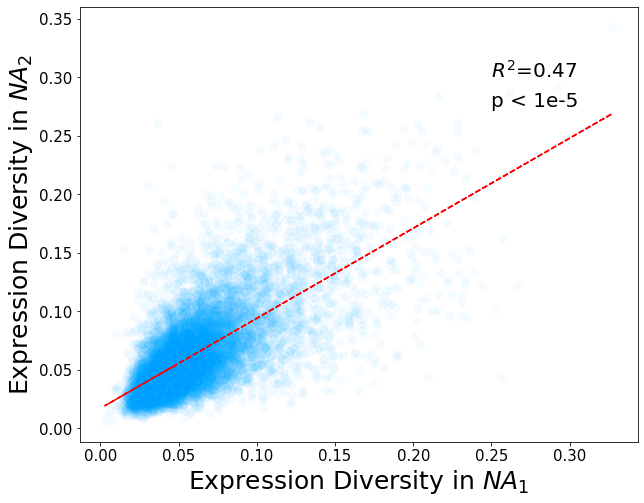

In [8]:
#### Combine the fpkm normalized read counts of NA1 and NA2 ####
a_NA1 = NA1_rawreads.iloc[:, :-1]
a_NA2 = NA2_rawreads.iloc[:, :-1]
a_NI = pd.concat([a_NA1, a_NA2], axis = 1).dropna()

a_NI = conorm.tmm(a_NI) ## tmm normalization
a_NI = np.log10(a_NI + 1) ## log10 normalized read counts

a_NA1 = a_NI[NA1]
a_NA2 = a_NI[NA2]

#### Expression diversity ####
expression_diversity_NA1 = ED(a_NA1, None, 'no')
expression_diversity_NA1.columns = ['ED_NA1'] 
expression_diversity_NA2 = ED(a_NA2, None, 'no')
expression_diversity_NA2.columns = ['ED_NA2']

#### Plots ####
plt.figure(figsize = (10, 8))
shared = set(expression_diversity_NA1.index).intersection(set(expression_diversity_NA2.index))
z = np.polyfit(expression_diversity_NA1.loc[shared]['ED_NA1'], expression_diversity_NA2.loc[shared]['ED_NA2'], 1)
slope = z[0]
display(slope)
p = np.poly1d(z)
ax = sns.scatterplot(x = expression_diversity_NA1['ED_NA1'], y = expression_diversity_NA2['ED_NA2'], alpha = 0.04, s = 60, color = 'deepskyblue', edgecolor = 'dodgerblue')
plt.plot(expression_diversity_NA1.loc[shared]['ED_NA1'], p(expression_diversity_NA1.loc[shared]['ED_NA1']), "r--")
R = stats.pearsonr(expression_diversity_NA1.loc[shared]['ED_NA1'], expression_diversity_NA2.loc[shared]['ED_NA2'])[0]**2
pval = stats.pearsonr(expression_diversity_NA1.loc[shared]['ED_NA1'], expression_diversity_NA2.loc[shared]['ED_NA2'])[1]
print(R, pval)
plt.text(0.25, 0.3, '$R^2$=' + str(round(R, 2)), fontsize = 20)
plt.text(0.25, 0.275, 'p < 1e-5', fontsize = 20)
plt.xlabel('Expression Diversity in $NA_1$', fontsize = 25)
plt.ylabel('Expression Diversity in $NA_2$', fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig('/research/projects/chlamydomonas/NIexpression/data/plots/ED_NA1xNA2.pdf', dpi = 1600, bbox_inches = 'tight', format = 'pdf')

0.5366477127627703

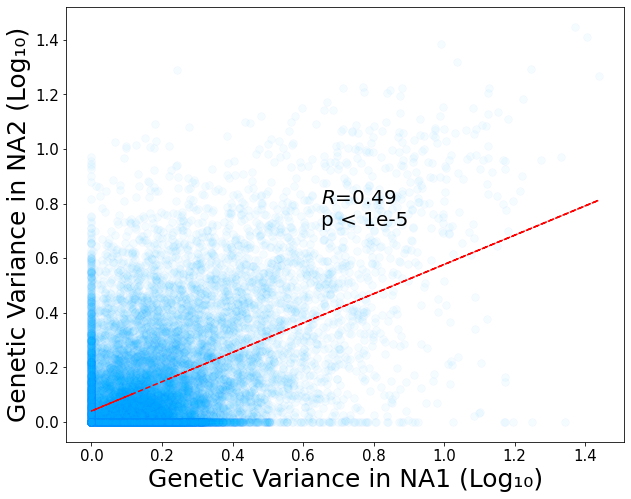

In [9]:
NA1_Vg = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/genetic_variance/NA1_genetic_variance_minus_mt.txt', delimiter = '\t', index_col = 'Unnamed: 0', header = 0)
NA2_Vg = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/genetic_variance/NA2_genetic_variance_minus_mt.txt', delimiter = '\t', index_col = 'Unnamed: 0', header = 0)

Vg = pd.concat([np.log10(NA1_Vg + 1), np.log10(NA2_Vg + 1)], axis = 1)
Vg.columns = ['NA1', 'NA2']

#### Formatting Log10 ####
element = 'Log'
subscript1 = "\u2081"
subscript0 = "\u2080"

#### Plots ####
plt.figure(figsize = (10, 8))
z = np.polyfit(Vg['NA1'], Vg['NA2'], 1)
slope = z[0] ##slope
display(slope)
p = np.poly1d(z)
ax = sns.scatterplot(data = Vg, x = 'NA1', y = 'NA2', alpha = 0.04, s = 60, color = 'deepskyblue', edgecolor = 'dodgerblue')
plt.plot(Vg['NA1'], p(Vg['NA1']), "r--")
R = stats.pearsonr(Vg['NA1'], Vg['NA2'])[0]
pval = stats.pearsonr(Vg['NA1'], Vg['NA2'])[1]

plt.text(0.65, 0.8, '$R$=' + str(round(R, 2)), fontsize = 20)
plt.text(0.65, 0.72, 'p < 1e-5', fontsize = 20)
plt.xlabel('Genetic Variance in NA1' + " ("+ f"{element}{subscript1}{subscript0}" + ")", fontsize = 25)
plt.ylabel('Genetic Variance in NA2' + " ("+ f"{element}{subscript1}{subscript0}" + ")", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig('/research/projects/chlamydomonas/NIexpression/data/plots/Vg_NA1xNA2.pdf', dpi = 1600, bbox_inches = 'tight', format = 'pdf')

## Correlation of Expression Counts Between <i>Chlamydomonas</i> Species

PearsonRResult(statistic=0.7540925372486444, pvalue=0.0)

('CREN', 'CINC')=7765


PearsonRResult(statistic=0.7621191934562055, pvalue=0.0)

('CREN', 'CSCH')=7416


PearsonRResult(statistic=0.7895389603386508, pvalue=0.0)

('CREN', 'JG05')=7843


PearsonRResult(statistic=0.7718002722477705, pvalue=0.0)

('CREN', 'MALA')=7747


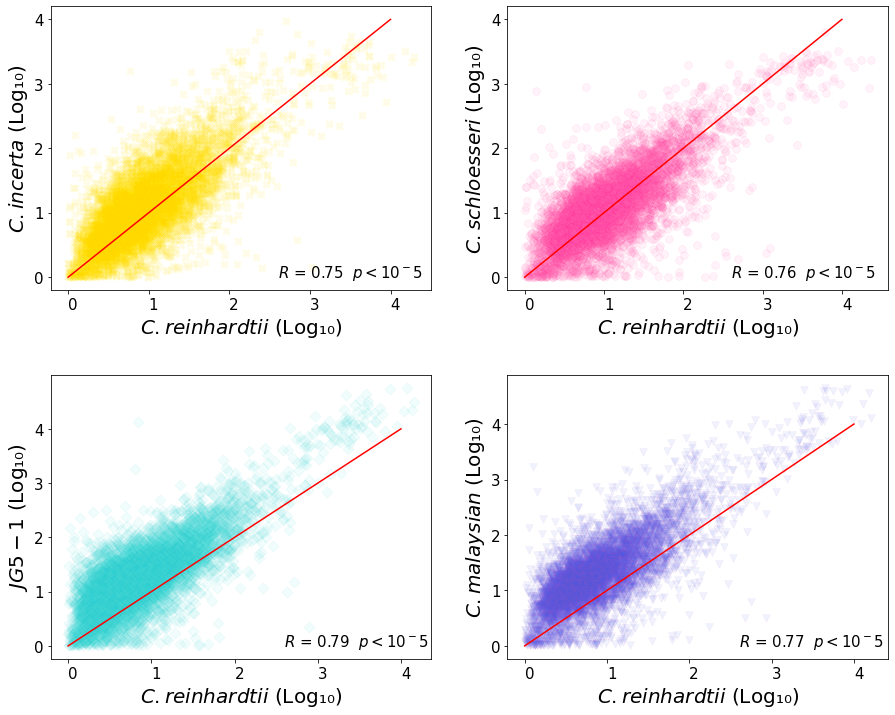

In [12]:
CREN_orthologous_genes = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/orthologs/filteredRBH_orthologous_pairs.txt', delimiter = '\t')
CREN_orthologous_genes.columns = ['CINC', 'CREN', 'MALA', 'CSCH', 'JG05']

comb0 = [('CREN', 'CINC'), ('CREN', 'CSCH'), ('CREN', 'JG05'), ('CREN', 'MALA')]
dic = {'CSCH': 'C. schloesseri', 'CREN': 'C. reinhardtii', 'JG05': 'JG5-1', 'MALA': 'C. malaysian', 'CINC':'C. incerta'}
CREN_outliers = {}

#### Rounding function ####
Round = lambda x, n: eval('"%.'+str(int(n))+'f" % '+repr(int(x)+round(float('.'+str(float(x)).split('.')[1]),n)))

#### Formatting Log10 ####
element = 'Log'
subscript1 = "\u2081"
subscript0 = "\u2080"

colour = ['gold', "hotpink", "#52DFDD", "#4361EE"]
edgecol = ['yellow', 'deeppink', 'darkturquoise', 'mediumorchid']
markers = ['X', 'o', 'D', 'v']

figure, axis = plt.subplots(2, 2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.3)

for i, ax, col, point, edge in zip(comb0, axis.ravel(), colour, markers, edgecol):
    a = CREN_orthologous_genes[[i[0], i[1]]].dropna()
    a = TMM_norm(a, mean_rawreads['median'], 'no')
    a = a.replace(0, np.nan).dropna()  ## removing rows with at least one gene with 0 counts 
    a['log10(FC)'] = np.log10((a[a.columns[1]] + 1)/(a[a.columns[0]] + 1))
    #### Calling DEGs ####
    degs = a[(a['log10(FC)'] >= 0.3) & (a[a.columns[0]] >= 10) & (a[a.columns[1]] >= 10)]
    CREN_outliers[i] = degs.index
    
    #### Log10 transformed read counts ####
    a['log10_' + a.columns[0]] = np.log10(a[a.columns[0]] + 1)
    a['log10_' + a.columns[1]] = np.log10(a[a.columns[1]] + 1)

    R = stats.pearsonr(a['log10_' + a.columns[0]], a['log10_' + a.columns[1]])
    display(R)
    sns.scatterplot(x = a['log10_' + a.columns[0]], y = a['log10_' + a.columns[1]], ax = ax, alpha = 0.08, s = 60, color = col, marker = point, edgecolor = edge)
    ax.text(2.6, 0, '$R$ = ' + Round(R[0], 2) + '  ' + '$p < 10^-5$', fontsize=15)
    print(str(i) + '=' + str(len(a)))
    
    #### Plotting x = y line ####
    x = np.array([0, 1, 2, 3, 4])  # X-axis points
    y = x  # Y-axis points
    ax.plot(x, y, color = 'red')
    
    ax.set_xlabel('$' + dic[a.columns[0]] + '$' + " ("+ f"{element}{subscript1}{subscript0}" + ")", fontsize = 20)
    ax.set_ylabel('$' + dic[a.columns[1]] + '$' + " ("+ f"{element}{subscript1}{subscript0}" + ")", fontsize = 20)
    plt.setp(ax.get_xticklabels(), fontsize=15, horizontalalignment="left")
    plt.setp(ax.get_yticklabels(), fontsize=15)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    
plt.savefig('/research/projects/chlamydomonas/NIexpression/data/plots/correlation_expression_species.pdf', dpi = 1600, bbox_inches = 'tight', format = 'pdf')

#### DEGs between C. reinhardtii ortholog pairs ####
df = pd.DataFrame(dict([(key, pd.Series(value)) for key, value in CREN_outliers.items()]))
CREN_shared_outliers = set(df[df.columns[0]]) & set(df[df.columns[1]]) & set(df[df.columns[2]]) & set(df[df.columns[3]])

PearsonRResult(statistic=0.8459687975686652, pvalue=0.0)

('CINC', 'MALA')=8052


PearsonRResult(statistic=0.8185900589067239, pvalue=0.0)

('CINC', 'CSCH')=7737


PearsonRResult(statistic=0.7498042193516635, pvalue=0.0)

('CINC', 'JG05')=8098


PearsonRResult(statistic=0.8288631341443341, pvalue=0.0)

('MALA', 'CSCH')=8821


PearsonRResult(statistic=0.7592749180184113, pvalue=0.0)

('MALA', 'JG05')=8257


PearsonRResult(statistic=0.7693318249186167, pvalue=0.0)

('CSCH', 'JG05')=7784


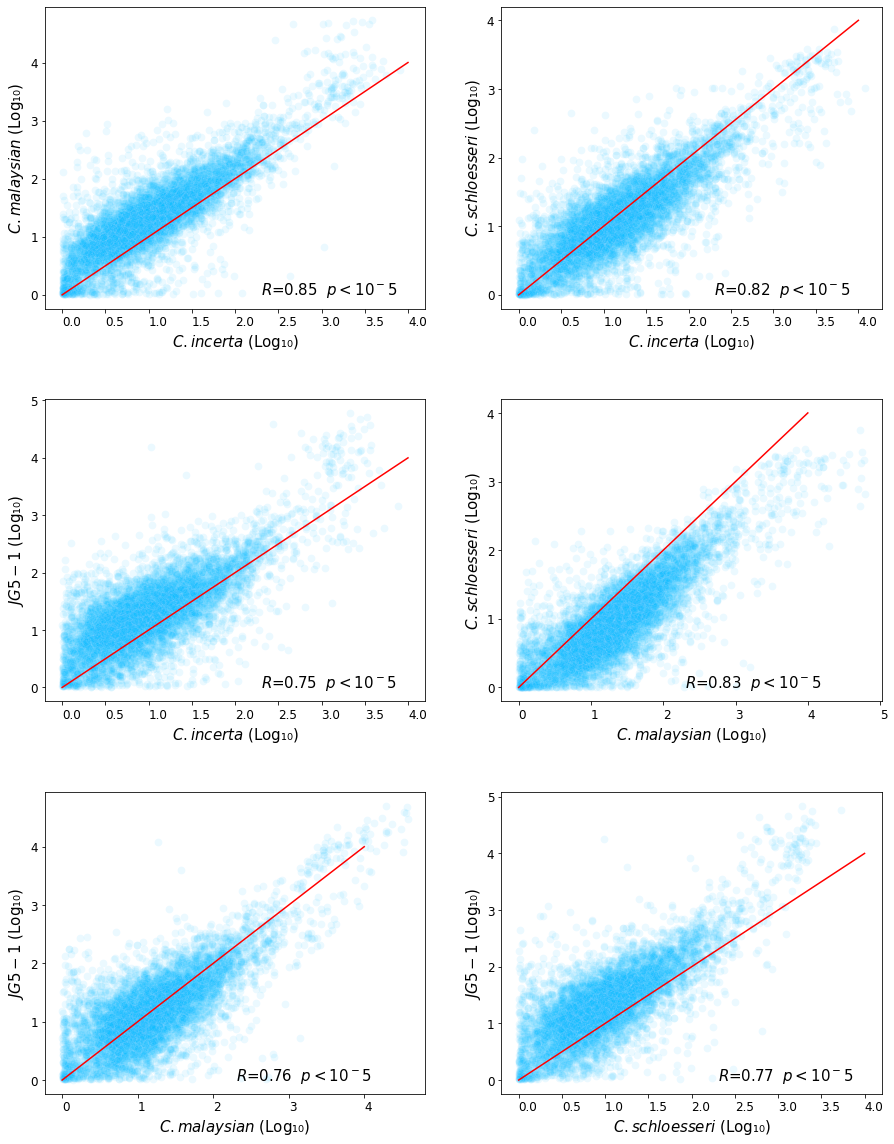

In [10]:
CREN_orthologous_genes = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/orthologs/filteredRBH_orthologous_pairs.txt', delimiter = '\t')
CREN_orthologous_genes.columns = ['CINC', 'CREN', 'MALA', 'CSCH', 'JG05']

def remove_specific_combinations(iterable, r, combinations_to_remove): ## found online
    for comb in combinations(iterable, r):
        if comb not in combinations_to_remove:
            yield comb
            
comb0 = remove_specific_combinations(CREN_orthologous_genes.columns, 2, {('CINC', 'CREN'), ('CREN', 'CSCH'), ('CREN', 'JG05'), ('CREN', 'MALA')})

dic = {'CSCH': 'C. schloesseri', 'CREN': 'C. reinhardtii', 'JG05': 'JG5-1', 'MALA': 'C. malaysian', 'CINC':'C. incerta'}
CREN_outliers = {}

#### Rounding function ####
Round = lambda x, n: eval('"%.'+str(int(n))+'f" % '+repr(int(x)+round(float('.'+str(float(x)).split('.')[1]),n)))

#### Formatting Log10 ####
element = 'Log'
subscript1 = "\u2081"
subscript0 = "\u2080"

figure, axis = plt.subplots(3, 2, figsize=(15, 20))
plt.subplots_adjust(hspace=0.3)

for i, ax in zip(comb0, axis.ravel()):
    a = CREN_orthologous_genes[[i[0], i[1]]].dropna()
    a = TMM_norm(a, mean_rawreads['median'], 'no')
    a = a.replace(0, np.nan).dropna()  ## removing rows with at least one gene with 0 counts 
    a['log10(FC)'] = np.log10((a[a.columns[1]] + 1)/(a[a.columns[0]] + 1))
    
    #### Log10 transformed read counts ####
    a['log10_' + a.columns[0]] = np.log10(a[a.columns[0]] + 1)
    a['log10_' + a.columns[1]] = np.log10(a[a.columns[1]] + 1)
    R = stats.pearsonr(a['log10_' + a.columns[0]], a['log10_' + a.columns[1]])
    display(R)
    sns.scatterplot(x = a['log10_' + a.columns[0]], y = a['log10_' + a.columns[1]], ax = ax, alpha = 0.08, s = 60, color = 'deepskyblue')
    ax.text(2.3, 0, '$R$=' + Round(R[0], 2) + '  ' + '$p < 10^-5$', fontsize=15)
    print(str(i) + '=' + str(len(a)))
    #### Plotting x = y line ####
    x = np.array([0, 1, 2, 3, 4])  # X-axis points
    y = x  # Y-axis points
    ax.plot(x, y, color = 'red')
    ax.set_xlabel('$' + dic[a.columns[0]] + '$'+ " ("+ f"{element}{subscript1}{subscript0}" + ")", fontsize = 15)
    ax.set_ylabel('$' + dic[a.columns[1]] + '$'+ " ("+ f"{element}{subscript1}{subscript0}" + ")", fontsize = 15)
    plt.setp(ax.get_xticklabels(), fontsize = 12, horizontalalignment="left")
    plt.setp(ax.get_yticklabels(), fontsize = 12)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
                               
plt.savefig('/research/projects/chlamydomonas/NIexpression/data/plots/correlation_expression_species2.pdf', dpi = 1600, bbox_inches = 'tight', format = 'pdf')

## C. reinhardtii: Mutational Variance and Genetic Variance

In [10]:
#### Mutational Variance ####
CC2344_Vm = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/mutational_variance/CC2344_Vm_noANC.txt', delimiter = '\t')['Vm_gen_noint']
CC2931_Vm = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/mutational_variance/CC2931_Vm_noANC.txt', delimiter = '\t')['Vm_gen_noint']
CC2344_Vm = 2*(np.log2(2)/np.log(2))*CC2344_Vm
CC2344_Vm.name = 'CC2344_Vm'
CC2931_Vm = 2*(np.log2(2)/np.log(2))*CC2931_Vm
CC2931_Vm.name = 'CC2931_Vm'
Vm = pd.concat([CC2344_Vm, CC2931_Vm], axis = 1)
Vm['average_Vm'] = Vm.mean(axis = 1)

CC2931_MA = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/raw_counts/CC2931_deseq_normalized.txt', delimiter = '\t')
CC2931_MA['mean'] = CC2931_MA.mean(axis = 1)
CC2344_MA = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/raw_counts/CC2344_deseq_normalized.txt', delimiter = '\t')
CC2344_MA['mean'] = CC2344_MA.mean(axis = 1)
lowreadcount2 = list(set(CC2344_MA.loc[CC2344_MA['mean'] < 10].index).intersection(CC2931_MA.loc[CC2931_MA['mean'] < 10].index))

#### Removing genes with low read counts ####
Vm = Vm.drop(lowreadcount2)

#### Genetic Variance ####
Vg = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/genetic_variance/genetic_variance_minus_mt.txt', delimiter = '\t')

avg_NI = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/raw_counts/avg_NI_deseq.txt', delimiter = '\t', index_col = 'Unnamed: 0')
avg_NI['mean'] = avg_NI.mean(axis = 1)
lowreadcount1 = avg_NI.loc[avg_NI['mean'] < 10].index.values.tolist()
Vg = Vg.drop(lowreadcount1)

    - **Expression divergence vs Mutational variance**
    - **Expression divergence vs Genetic variance**
    - **Expression divergence vs Nonsynonymous sites**
    - **Expression divergence vs Synonymous sites**
    - **Expression divergence vs Nonsynonymous sites/Synonymous sites**

Comparing the expression divergence and mutational variance for each pair of orthologous genes, only considering pairs with C. reinhardtii.

(['CREN', 'CINC'], 'median') 7731
(['CREN', 'CSCH'], 'median') 7392
(['CREN', 'JG05'], 'median') 7675
(['CREN', 'MALA'], 'median') 7602


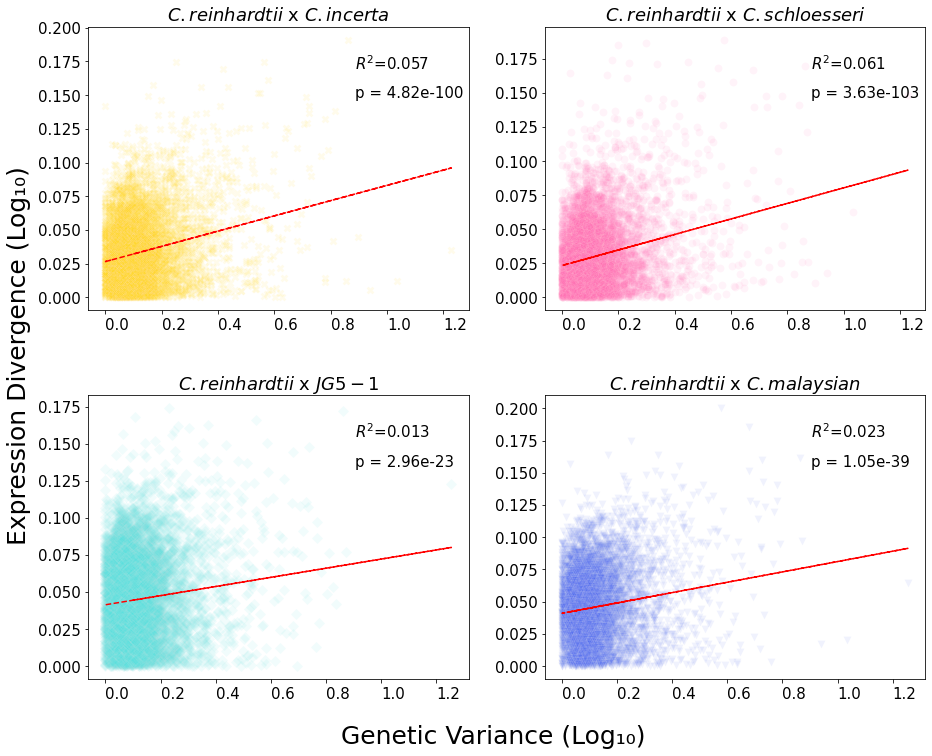

In [11]:
CREN_orthologous_genes = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/orthologs/filteredRBH_orthologous_pairs.txt', delimiter = '\t')
CREN_orthologous_genes.columns = ['CINC', 'CREN', 'MALA', 'CSCH', 'JG05']

dic = {'CSCH': 'C. schloesseri', 'CREN': 'C. reinhardtii', 'JG05': 'JG5-1', 'MALA': 'C. malaysian', 'CINC':'C. incerta'}

stats_CREN = pd.DataFrame()
comb0 = [['CREN', 'CINC'], ['CREN', 'CSCH'], ['CREN', 'JG05'], ['CREN', 'MALA']]
all_ED = pd.DataFrame()
quantiles = ['median']
 
figure, axis = plt.subplots(2, 2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.3)

unique_combinations = []
colour = ['gold', "hotpink", "#52DFDD", "#4361EE"]
edgecol = ['yellow', 'deeppink', 'darkturquoise', 'mediumorchid']
markers = ['X', 'o', 'D', 'v']

#### Formatting Log10 ####
element = 'Log'
subscript1 = "\u2081"
subscript0 = "\u2080"
 
for i in comb0:
    for j in range(len(quantiles)):
        unique_combinations.append((i, quantiles[j]))
        
for i, ax, col, point, edge in zip(unique_combinations, axis.ravel(), colour, markers, edgecol):
    a = CREN_orthologous_genes[[i[0][0], i[0][1]]].dropna()
    a = TMM_norm(a, mean_rawreads[i[1]], 'log')
    a = a.replace(0, np.nan).dropna()  ## removing rows with at least one gene with 0 counts 
    expression_divergence = ED(a, 'CREN', 'no')
    
    #### Genetic distance ####
    file = '/research/projects/chlamydomonas/NIexpression/data/orthologs/divergence_' + str(i[0][0]) + '_' + str(i[0][1]) + '.out.txt'
    genetic_dis = pd.read_csv(file, delimiter = '\t')
    genetic_dis.columns = [str(i[0][0]), str(i[0][1]), 'k0', 'k4', 'sites']
    genetic_dis = genetic_dis.loc[genetic_dis['k0'] < 0.60]
    for k in ['k0', 'k4', 'sites']:
        genetic_dis.loc[genetic_dis[k].isin(['None']), k] = np.nan
    genetic_dis = genetic_dis.astype({'k0': float, 'k4': float, 'sites': float})
    genetic_dis['k0/k4'] = genetic_dis['k0']/genetic_dis['k4']

    #### Expression divergence -- Mutational Variance ####
    expression_divergence.columns = ['ED']
    all_ED[str(i)] = expression_divergence['ED']
    
    #### Expression divergence -- Genetic Variance ####
    average_ED = pd.concat([Vm, expression_divergence, Vg, genetic_dis.set_index('CREN')[['k0', 'k4', 'k0/k4']]], axis = 1).dropna()
    average_ED['Vg/Vm'] = average_ED['Vg']/average_ED['average_Vm']
    average_ED = average_ED.replace(-np.inf, np.nan).replace(np.inf, np.nan).dropna()
    
    #### Statistics ####
    stats_CREN.loc['sample_size', str(i[0][1])] = len(expression_divergence)
    stats_CREN.loc['total_ED', str(i[0][1])] = expression_divergence['ED'].sum()
    stats_CREN.loc['mean', str(i[0][1])] = expression_divergence['ED'].mean()
    stats_CREN.loc['median', str(i[0][1])] = expression_divergence['ED'].median()
    
    stats_CREN.loc['R: EDxVm', str(i[0][1])] = stats.pearsonr(np.log10(average_ED['ED'] + 1), average_ED['average_Vm'])[0]
    stats_CREN.loc['pval: EDxVm', str(i[0][1])] = stats.pearsonr(np.log10(average_ED['ED'] + 1), average_ED['average_Vm'])[1]
    
    stats_CREN.loc['R: EDxVg', str(i[0][1])] = stats.pearsonr(np.log10(average_ED['ED'] + 1), np.log10(average_ED['Vg'] + 1))[0]
    stats_CREN.loc['pval: EDxVg', str(i[0][1])] = stats.pearsonr(np.log10(average_ED['ED'] + 1), np.log10(average_ED['Vg'] + 1))[1]
    
    stats_CREN.loc['R: EDxVg/Vm', str(i[0][1])] = stats.pearsonr(np.log10(average_ED['ED'] + 1), average_ED['Vg/Vm'])[0]
    stats_CREN.loc['pval: EDxVg/Vm', str(i[0][1])] = stats.pearsonr(np.log10(average_ED['ED'] + 1), average_ED['Vg/Vm'])[1]
    
    stats_CREN.loc['R: EDxk4', str(i[0][1])] = stats.pearsonr(np.log10(average_ED['ED'] + 1), average_ED['k4'])[0]
    stats_CREN.loc['pval: EDxk4', str(i[0][1])] = stats.pearsonr(np.log10(average_ED['ED'] + 1), average_ED['k4'])[1]
    
    stats_CREN.loc['R: EDxk0', str(i[0][1])] = stats.pearsonr(np.log10(average_ED['ED'] + 1), np.log10(average_ED['k0'] + 1))[0]
    stats_CREN.loc['pval: EDxk0', str(i[0][1])] = stats.pearsonr(np.log10(average_ED['ED'] + 1), np.log10(average_ED['k0'] + 1))[1]
    
    stats_CREN.loc['R: EDxk0k4', str(i[0][1])] = stats.pearsonr(np.log10(average_ED['ED'] + 1), average_ED['k0/k4'])[0]
    stats_CREN.loc['pval: EDxk0k4', str(i[0][1])] = stats.pearsonr(np.log10(average_ED['ED'] + 1), average_ED['k0/k4'])[1]
    
    average_ED.to_csv('/research/projects/chlamydomonas/NIexpression/data/expression_divergence/CRENx' + str(i[0][1]) + '.csv', sep = '\t', index = False, header = True)
    
    print(str(i) + ' ' + str(len(average_ED)))
    
#     #### Plot - Expression divergence vs Genetic divergence ####
#     z = np.polyfit(average_ED['k4'], np.log10(average_ED['ED'] + 1), 1)
#     p = np.poly1d(z)
#     sns.scatterplot(x = average_ED['k4'], y = np.log10(average_ED['ED'] + 1), alpha = 0.08, ax = ax, color = col, marker = point, s = 60)
#     R = stats_CREN.loc['R: EDxk4', i[0][1]]**2
#     pval = stats_CREN.loc['pval: EDxk4', i[0][1]]
#     ax.text(0.7, 0.85, '$R^2$=' + str(round(R, 4)), fontsize=15, transform=ax.transAxes)
#     if pval < 0.005:
#         ax.text(0.7, 0.75, 'p = ' + f'{pval:.2e}', fontsize=15, transform=ax.transAxes)
#     else:
#         ax.text(0.7, 0.75, 'p = ' + str(round(pval, 3)), fontsize=15, transform=ax.transAxes)
#     ax.plot(average_ED['k4'], p(average_ED['k4']), "r--")
#     ax.set_title('$' + dic[str(i[0][0])] + '$' + ' x ' + '$' + dic[str(i[0][1])] + '$', fontsize = 18)
#     ax.set_xlabel('Genetic Divergence', fontsize = 15).set_visible(False)
#     ax.set_ylabel('Expression Divergence', fontsize = 15).set_visible(False)
#     plt.setp(ax.get_xticklabels(), fontsize=15, horizontalalignment="left")
#     plt.setp(ax.get_yticklabels(), fontsize=15)
# figure.text(0.5, 0.05, 'Genetic Divergence', ha='center', fontsize = 25)
# figure.text(0.05, 0.5, 'Expression Divergence' + " ("+ f"{element}{subscript1}{subscript0}" + ")", va='center', rotation='vertical', fontsize = 25)
# plt.savefig('/research/projects/chlamydomonas/NIexpression/data/plots/EDxGeneticdivergence.pdf', dpi = 1600, bbox_inches = 'tight', format = 'pdf')
   
#     #### Plot - Expression divergence vs Nonsynonymous sites ####
#     z = np.polyfit(np.log10(average_ED['k0'] + 1), np.log10(average_ED['ED'] + 1), 1)
#     p = np.poly1d(z)
#     sns.scatterplot(x = np.log10(average_ED['k0'] + 1), y = np.log10(average_ED['ED'] + 1), alpha = 0.08, s = 60, ax = ax, color = col, marker = point)
#     R = stats_CREN.loc['R: EDxk0', i[0][1]]**2
#     pval = stats_CREN.loc['pval: EDxk0', i[0][1]]
#     ax.text(0.7, 0.85, '$R^2$=' + str(round(R, 4)), fontsize=15, transform=ax.transAxes)
#     if pval < 0.005:
#         ax.text(0.7, 0.75, 'p = ' + f'{pval:.2e}', fontsize=15, transform=ax.transAxes)
#     else:
#         ax.text(0.7, 0.75, 'p = ' + str(round(pval, 3)), fontsize=15, transform=ax.transAxes)
#     ax.plot(np.log10(average_ED['k0'] + 1), p(np.log10(average_ED['k0'] + 1)), "r--")
#     ax.set_title('$' + dic[str(i[0][0])] + '$' + ' x ' + '$' + dic[str(i[0][1])] + '$', fontsize = 18)
#     ax.set_xlabel('Nonsynonymous Substitution Rate', fontsize = 15).set_visible(False)
#     ax.set_ylabel('Expression Divergence', fontsize = 15).set_visible(False)
#     plt.setp(ax.get_xticklabels(), fontsize=15, rotation = 15)
#     plt.setp(ax.get_yticklabels(), fontsize=15)
# figure.text(0.5, 0.05, 'Nonsynonymous Substitution Rate' + " ("+ f"{element}{subscript1}{subscript0}" + ")", ha='center', fontsize = 25)
# figure.text(0.05, 0.5, 'Expression Divergence' + " ("+ f"{element}{subscript1}{subscript0}" + ")", va='center', rotation='vertical', fontsize = 25)
# plt.savefig('/research/projects/chlamydomonas/NIexpression/data/plots/EDxKa.pdf', dpi = 1600, bbox_inches = 'tight', format = 'pdf')

#     #### Plot - Expression divergence vs Mutational variance ####
#     z = np.polyfit(average_ED['average_Vm'], np.log10(average_ED['ED'] + 1), 1)
#     p = np.poly1d(z)
#     sns.scatterplot(x = average_ED['average_Vm'], y = np.log10(average_ED['ED'] + 1), alpha = 0.08, s = 60, ax = ax, color = col, marker = point)
#     R = stats_CREN.loc['R: EDxVm', i[0][1]]**2
#     pval = stats_CREN.loc['pval: EDxVm', i[0][1]]
#     if pval < 0.0005:
#         ax.text(0.7, 0.75, 'p = ' + f'{pval:.2e}', fontsize=15, transform=ax.transAxes)
#     else:
#         ax.text(0.7, 0.75, 'p = ' + str(round(pval, 3)), fontsize=15, transform=ax.transAxes)
#     ax.text(0.7, 0.85, '$R^2$=' + str(round(R, 4)), fontsize=15, transform=ax.transAxes)
#     ax.plot(average_ED['average_Vm'], p(average_ED['average_Vm']), "r--")
#     ax.set_title('$' + dic[str(i[0][0])] + '$' + ' x ' + '$' + dic[str(i[0][1])] + '$', fontsize = 18)
#     ax.set_xlabel('Mutational Variance', fontsize = 15).set_visible(False)
#     ax.set_ylabel('Expression Divergence', fontsize = 15).set_visible(False)
#     plt.setp(ax.get_xticklabels(), fontsize=15, rotation = 15)
#     plt.setp(ax.get_yticklabels(), fontsize=15)
# figure.text(0.5, 0.05, 'Mutational Variance', ha='center', fontsize = 25)
# figure.text(0.05, 0.5, 'Expression Divergence' + " ("+ f"{element}{subscript1}{subscript0}" + ")", va='center', rotation='vertical', fontsize = 25)
# plt.savefig('/research/projects/chlamydomonas/NIexpression/data/plots/EDxVm.pdf', dpi = 1600, bbox_inches = 'tight', format = 'pdf')
    
    #### Plot - Expression divergence vs Genetic variance ####
    z = np.polyfit(np.log10(average_ED['Vg'] + 1), np.log10(average_ED['ED'] + 1), 1)
    p = np.poly1d(z)
    sns.scatterplot(x = np.log10(average_ED['Vg'] + 1), y = np.log10(average_ED['ED'] + 1), alpha = 0.08, ax = ax, s = 60, color=col, marker = point)
    R = stats_CREN.loc['R: EDxVg', i[0][1]]**2
    pval = stats_CREN.loc['pval: EDxVg', i[0][1]]
    ax.text(0.7, 0.85, '$R^2$=' + str(round(R, 3)), fontsize=15, transform=ax.transAxes)
    ax.text(0.7, 0.75, 'p = ' + f'{pval:.2e}', fontsize=15, transform=ax.transAxes)
    ax.plot(np.log10(average_ED['Vg'] + 1), p(np.log10(average_ED['Vg'] + 1)), "r--")
    ax.set_title('$' + dic[str(i[0][0])] + '$' + ' x ' + '$' + dic[str(i[0][1])] + '$', fontsize = 18)
    ax.set_xlabel('Genetic Variance', fontsize = 15).set_visible(False)
    ax.set_ylabel('Expression Divergence', fontsize = 15).set_visible(False)
    plt.setp(ax.get_xticklabels(), fontsize=15, horizontalalignment="left")
    plt.setp(ax.get_yticklabels(), fontsize=15)
figure.text(0.5, 0.05, 'Genetic Variance' + " ("+ f"{element}{subscript1}{subscript0}" + ")", ha='center', fontsize = 25)
figure.text(0.05, 0.5, 'Expression Divergence' + " ("+ f"{element}{subscript1}{subscript0}" + ")", va='center', rotation='vertical', fontsize = 25)
plt.savefig('/research/projects/chlamydomonas/NIexpression/data/plots/EDxVg.pdf', dpi = 1600, bbox_inches = 'tight', format = 'pdf')

## Mantel Test: Genetic Divergence vs Expression Divergence

In [15]:
CREN_orthologous_genes = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/orthologs/filteredRBH_orthologous_pairs.txt', delimiter = '\t')
CREN_orthologous_genes.columns = ['CINC', 'CREN', 'MALA', 'CSCH', 'JG05']
dic = {'CSCH': 'C. schloesseri', 'CREN': 'C. reinhardtii', 'JG05': 'JG5-1', 'MALA': 'C. malaysian', 'CINC':'C. incerta'}

#### Species pairs ####
genetic_distance = pd.DataFrame()
directory = '/research/projects/chlamydomonas/NIexpression/data/orthologs/'
 
comb0 = []
for filename in os.listdir(directory):
    if re.findall('divergence', filename):
        f = os.path.join('', filename)
        f = f.replace('.out.txt', '').split('_')[1:]
        comb0.append(f)
#####################################################        
quantiles = ['median']
eni_gd = {}
eni_ed = {}
 
unique_combinations = []
 
for i in comb0:
    for j in range(len(quantiles)):
        unique_combinations.append((i, quantiles[j]))

for i in unique_combinations:
    a = CREN_orthologous_genes[[i[0][0], i[0][1]]].dropna()
    if 'CREN' in i[0]:
        a = TMM_norm(a, mean_rawreads[i[1]], 'log')
        expression_divergence = ED(a, 'CREN', 'no')
    if 'CREN' not in i[0]:
        a = TMM_norm(a, None, 'log') 
        expression_divergence = ED(a, None, 'no')
    
    expression_divergence.columns = [str(i[0][0] + '_' + i[0][1])]
    
    #### Genetic divergence ####
    file = '/research/projects/chlamydomonas/NIexpression/data/orthologs/divergence_' + str(i[0][0]) + '_' + str(i[0][1]) + '.out.txt'
    genetic_dis = pd.read_csv(file, delimiter = '\t')
    genetic_dis.columns = [str(i[0][0]), str(i[0][1]), 'k0', 'k4', 'sites']
    genetic_dis = genetic_dis.loc[genetic_dis['k0'] < 0.60]
    for k in ['k0', 'k4', 'sites']:
        genetic_dis.loc[genetic_dis[k].isin(['None']), k] = np.nan
    genetic_dis = genetic_dis.astype({'k0': float, 'k4': float, 'sites': float})
    genetic_dis['k0/k4'] = genetic_dis['k0']/genetic_dis['k4']
    genetic_dis.columns = genetic_dis.columns.str.replace('k4', i[0][0] + '_' + i[0][1])
    
    if 'CREN' in i[0]:
        shared_index = set(expression_divergence.index).intersection(set(genetic_dis['CREN']))
        expression_divergence = expression_divergence.loc[shared_index]
        genetic_dis.set_index('CREN', inplace = True)
        genetic_dis = genetic_dis.loc[shared_index]
    else:
        shared_index = set(expression_divergence.index).intersection(set(genetic_dis[genetic_dis.columns[1]]))
        expression_divergence = expression_divergence.loc[shared_index]
        genetic_dis.set_index(genetic_dis.columns[1], inplace = True)
        genetic_dis = genetic_dis.loc[shared_index]

    #### Details for Mantel's test ####
    eni_gd[i[0][0] + '_' + i[0][1]] = genetic_dis[i[0][0] + '_' + i[0][1]].values.tolist()
    eni_ed[i[0][0] + '_' + i[0][1]] = expression_divergence[i[0][0] + '_' + i[0][1]].values.tolist()

<ipython-input-15-3f7ef36f3547>:50: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  expression_divergence = expression_divergence.loc[shared_index]
<ipython-input-15-3f7ef36f3547>:52: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  genetic_dis = genetic_dis.loc[shared_index]
<ipython-input-15-3f7ef36f3547>:50: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  expression_divergence = expression_divergence.loc[shared_index]
<ipython-input-15-3f7ef36f3547>:52: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  genetic_dis = genetic_dis.loc[shared_index]
<ipython-input-15-3f7ef36f3547>:50: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  expression_divergence = expre

In [16]:
A = pd.DataFrame({k:pd.Series(v) for k,v in eni_gd.items()})
B = pd.DataFrame({k:pd.Series(v) for k,v in eni_ed.items()})

A_GD = A.mean(axis = 0)
B_ED = B.mean(axis = 0)
A_GD = pd.DataFrame(A_GD, columns = ['GD'])
A_GD.reset_index(inplace = True)
A_GD[['Line1', 'Line2']] = A_GD['index'].str.split('_', expand = True)
A_GD.set_index('index', inplace = True)
distance_matrix = pd.concat([A_GD, B_ED], axis = 1)
distance_matrix.columns = ['GD', 'Line1', 'Line2', 'ED']

In [17]:
#### Creating genetic matrix (6 x 6) ####
for subpop in [['CREN', 'MALA', 'CSCH', 'JG05']]:
    gd_matrix = []
    counter = []
    for i in subpop:
        array = []
        for a in subpop:
            if a == i:
                array.append(0)
            else:
                try:
                    array.append(distance_matrix.loc[(distance_matrix['Line1'].isin([i] + [a])) & (distance_matrix['Line2'].isin([i] + [a]))]['GD'].values[0])
                    counter.append((a, i))
                except:
                    continue
        if len(array) == 1:
            print(a + i)
        gd_matrix.append(array)
    
    #### Creating expression matrix (6 x 6) ####
    ed_matrix = []
    counter2 = []
    for i in subpop:
        array = []
        for a in subpop:
            if a == i:
                array.append(0)
            else:
                try:
                    array.append(distance_matrix.loc[(distance_matrix['Line1'].isin([i] + [a])) & (distance_matrix['Line2'].isin([i] + [a]))]['ED'].values[0])
                    counter2.append((a, i))
                except:
                    continue
        ed_matrix.append(array)
        
    #######################
    #### Mantel's Test ####
    #######################
    
    # Results = veridical correlation, empirical p-value, z-score #
    a = mantel.test(gd_matrix, ed_matrix, method='pearson', perms=1000000, tail='upper')
    
    display(a)

MantelResult(-0.20788314620030462, 0.375, -0.3642239941182611)

**Expression divergence vs Mutational variance**

Calculating expression divergence with the distance taken with respect to <i>C. reinhardtii<i/>
    
    - None = implies that we consider the expression divergence across every species pair then take the average per orthologous pair
    - CREN = implies that we consider the expression divergence across every C reinhardtii species pair, then take the average per orthologous pair

Number of genes in ED vs Vg = 5809


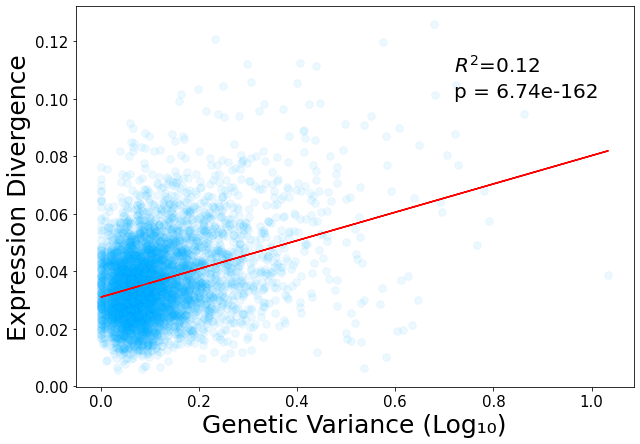

In [12]:
CREN_orthologous_genes = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/orthologs/filteredRBH_orthologous_pairs.txt', delimiter = '\t')
CREN_orthologous_genes.columns = ['CINC', 'CREN', 'MALA', 'CSCH', 'JG05']

#### 1:1 orthologous pairs across all species ####
orthologous_genes = pd.DataFrame()
a = [['CREN', 'MALA'], ['CREN', 'CSCH'], ['CREN', 'CINC'], ['CREN', 'JG05']]

for i in a:
    orthologous_genes = pd.concat([orthologous_genes, CREN_orthologous_genes[i].dropna().set_index('CREN')], axis = 1)
orthologous_genes.reset_index(inplace = True)

for i in combinations(CREN_orthologous_genes, 2):
    orthologous_genes = pd.merge(CREN_orthologous_genes[[i[0], i[1]]].dropna(), orthologous_genes, on = [i[0], i[1]])
       
stats_CREN = pd.DataFrame()
all_ED2 = pd.DataFrame()
quantiles = ['median']
comparison = [None]
 
unique_combinations = []
 
for j in quantiles:
    for i in comparison:
        unique_combinations.append((j, i))
        
#### Formatting Log10 ####
element = 'Log'
subscript1 = "\u2081"
subscript0 = "\u2080"

for fil in unique_combinations:
    normalized_counts = TMM_norm(orthologous_genes, mean_rawreads[fil[0]], 'log')
    average_ED = ED(normalized_counts, fil[1], 'no')
    average_ED.columns = ['average_ED']
    average_ED = average_ED[~average_ED.index.duplicated(keep='first')]
    all_ED2[str(fil)] = average_ED['average_ED']
    
    #### Expression bins ####
    bins = [np.percentile(Vm['average_Vm'], i) for i in range(0, 110, 10)]
    perc = [i for i in range(10, 110, 10)]
    Vm['expression_bins'] = pd.cut(Vm['average_Vm'], bins, labels = perc)

    #### Mutational Variance ####
    CREN_average_ED = pd.concat([Vm, average_ED], axis = 1).dropna()
        
    #### Genetic Variance ####
    CREN_average_ED = pd.concat([Vg, CREN_average_ED], axis = 1).dropna()
    
    #### Stats ####  
    stats_CREN.loc['R: EDxVm', [fil[0] + ', ' + str(fil[1])]] = stats.pearsonr(CREN_average_ED['average_ED'], CREN_average_ED['average_Vm'])[0]
    stats_CREN.loc['pval: EDxVm', [fil[0] + ', ' + str(fil[1])]] = stats.pearsonr(CREN_average_ED['average_ED'], CREN_average_ED['average_Vm'])[1]
    stats_CREN.loc['R: EDxCC2344Vm', [fil[0] + ', ' + str(fil[1])]] = stats.pearsonr(CREN_average_ED['average_ED'], CREN_average_ED['CC2344_Vm'])[0]
    stats_CREN.loc['pval: EDxCC2344Vm', [fil[0] + ', ' + str(fil[1])]] = stats.pearsonr(CREN_average_ED['average_ED'], CREN_average_ED['CC2344_Vm'])[1]
    stats_CREN.loc['R: EDxCC2931Vm', [fil[0] + ', ' + str(fil[1])]] = stats.pearsonr(CREN_average_ED['average_ED'], CREN_average_ED['CC2931_Vm'])[0]
    stats_CREN.loc['pval: EDxCC2931Vm', [fil[0] + ', ' + str(fil[1])]] = stats.pearsonr(CREN_average_ED['average_ED'], CREN_average_ED['CC2931_Vm'])[1]
    stats_CREN.loc['R: EDxVg', [fil[0] + ', ' + str(fil[1])]] = stats.pearsonr(CREN_average_ED['average_ED'], np.log10(CREN_average_ED['Vg'] + 1))[0]
    stats_CREN.loc['pval: EDxVg', [fil[0] + ', ' + str(fil[1])]] = stats.pearsonr(CREN_average_ED['average_ED'], np.log10(CREN_average_ED['Vg'] + 1))[1]
       
#     #### Plots - Expression divergence vs Mutational variance ####
#     plt.figure(figsize = (10, 7))
#     z = np.polyfit(CREN_average_ED['average_Vm'], np.log10(CREN_average_ED['average_ED'] + 1), 1)
#     p = np.poly1d(z)
#     plt.plot(CREN_average_ED['average_Vm'], p(CREN_average_ED['average_Vm']), "r")
#     ax = sns.scatterplot(x = CREN_average_ED['average_Vm'], y = np.log10(CREN_average_ED['average_ED'] + 1), alpha = 0.06, s = 60, color = 'deepskyblue', edgecolor = 'dodgerblue')
#     R = stats_CREN.loc['R: EDxVm', [fil[0] + ', ' + str(fil[1])]][0]**2
#     pval = stats_CREN.loc['pval: EDxVm', [fil[0] + ', ' + str(fil[1])]][0]
#     plt.text(0.005, 0.1, '$R^2$=' + str(round(R, 4)), fontsize = 20)
#     plt.text(0.005, 0.093, 'p = ' + f'{pval:.2e}', fontsize = 20)
#     plt.xlabel('Mutational Variance', fontsize = 25)
#     plt.ylabel('Expression Divergence', fontsize = 25)
#     plt.xticks(fontsize = 20)
#     plt.yticks(fontsize = 20)
#     plt.savefig('/research/projects/chlamydomonas/NIexpression/data/plots/ALL_EDxVm.pdf', dpi = 1600, bbox_inches = 'tight', format = 'pdf')

#     #### Plots - Expression divergence vs CC-2344 Mutational variance ####
#     plt.figure(figsize = (10, 7))
#     z = np.polyfit(CREN_average_ED['CC2344_Vm'], np.log10(CREN_average_ED['average_ED'] + 1), 1)
#     p = np.poly1d(z)
#     plt.plot(CREN_average_ED['CC2344_Vm'], p(CREN_average_ED['CC2344_Vm']), "r")
#     ax = sns.scatterplot(x = CREN_average_ED['CC2344_Vm'], y = np.log10(CREN_average_ED['average_ED'] + 1), alpha = 0.06, s = 60, color = 'deepskyblue', edgecolor = 'dodgerblue')
#     R = stats_CREN.loc['R: EDxCC2344Vm', [fil[0] + ', ' + str(fil[1])]][0]**2
#     pval = stats_CREN.loc['pval: EDxCC2344Vm', [fil[0] + ', ' + str(fil[1])]][0]
#     plt.text(0.01, 0.1, '$R^2$=' + str(round(R, 4)), fontsize = 20)
#     plt.text(0.01, 0.093, 'p = ' + str(round(pval, 3)), fontsize = 20)
#     plt.xlabel('CC-2344 Mutational Variance', fontsize = 25)
#     plt.ylabel('Expression Divergence', fontsize = 25)
#     plt.xticks(fontsize = 20)
#     plt.yticks(fontsize = 20)
#     plt.savefig('/research/projects/chlamydomonas/NIexpression/data/plots/ALL_EDxCC2344Vm.pdf', dpi = 1600, bbox_inches = 'tight', format = 'pdf')

#     #### Plots - Expression divergence vs CC-2931 Mutational variance ####
#     plt.figure(figsize = (10, 7))
#     z = np.polyfit(CREN_average_ED['CC2931_Vm'], np.log10(CREN_average_ED['average_ED'] + 1), 1)
#     p = np.poly1d(z)
#     plt.plot(CREN_average_ED['CC2931_Vm'], p(CREN_average_ED['CC2931_Vm']), "r")
#     ax = sns.scatterplot(x = CREN_average_ED['CC2931_Vm'], y = np.log10(CREN_average_ED['average_ED'] + 1), alpha = 0.06, s = 60, color = 'deepskyblue', edgecolor = 'dodgerblue')
#     R = stats_CREN.loc['R: EDxCC2931Vm', [fil[0] + ', ' + str(fil[1])]][0]**2
#     pval = stats_CREN.loc['pval: EDxCC2931Vm', [fil[0] + ', ' + str(fil[1])]][0]
#     plt.text(0.006, 0.1, '$R^2$=' + str(round(R, 4)), fontsize = 20)
#     plt.text(0.006, 0.093, 'p = ' + f'{pval:.2e}', fontsize = 20)
#     plt.xlabel('CC-2931 Mutational Variance', fontsize = 25)
#     plt.ylabel('Expression Divergence', fontsize = 25)
#     plt.xticks(fontsize = 20)
#     plt.yticks(fontsize = 20)
#     plt.savefig('/research/projects/chlamydomonas/NIexpression/data/plots/ALL_EDxCC2931Vm.pdf', dpi = 1600, bbox_inches = 'tight', format = 'pdf')

    #### Plots - Expression divergence vs Genetic variance ####
    CREN_average_ED['log10(Vg)'] = np.log10(CREN_average_ED['Vg'] + 1)
    
    section = CREN_average_ED[['log10(Vg)', 'average_ED']].replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()
    print('Number of genes in ED vs Vg = ' + str(len(section)))
    plt.figure(figsize = (10, 7))
    z = np.polyfit(section['log10(Vg)'], np.log10(section['average_ED'] + 1), 1)
    p = np.poly1d(z)
    plt.plot(section['log10(Vg)'], p(section['log10(Vg)']), "r")
    ax = sns.scatterplot(x = section['log10(Vg)'], y = np.log10(section['average_ED'] + 1), alpha = 0.08, s = 60, color = 'deepskyblue', edgecolor = 'dodgerblue')
    R = stats_CREN.loc['R: EDxVg', [fil[0] + ', ' + str(fil[1])]][0]**2
    pval = stats_CREN.loc['pval: EDxVg', [fil[0] + ', ' + str(fil[1])]][0]
    plt.figtext(0.65, 0.75, '$R^2$=' + str(round(R, 2)), fontsize = 20)
    plt.figtext(0.65, 0.70, 'p = ' + f'{pval:.2e}', fontsize = 20)
    plt.xlabel('Genetic Variance' + " ("+ f"{element}{subscript1}{subscript0}" + ")", fontsize = 25)
    plt.ylabel('Expression Divergence', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.savefig('/research/projects/chlamydomonas/NIexpression/data/plots/ALL_EDxVg.pdf', dpi = 1600, bbox_inches = 'tight', format = 'pdf')

In [24]:
CREN_average_ED.to_csv('/research/projects/chlamydomonas/NIexpression/data/expression_divergence/extra_info.csv', sep = '\t', index = True, header = True)

In [25]:
all_ED2.to_csv('/research/projects/chlamydomonas/NIexpression/data/expression_divergence/ED_across_species.csv', sep = '\t', index = True, header = True)

# 1:1:1:1:1 Orthologous Genes

In [7]:
def combining_FPKM(species_wide, CREN):
            
    """ Combining FPKM normalization where the CREN reference is given """
    
    specieswide_count = species_wide.copy()
    
    CREN_orthologous_genes = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/orthologs/filteredRBH_orthologous_pairs.txt', delimiter = '\t')
    CREN_orthologous_genes.columns = ['CINC', 'CREN', 'MALA', 'CSCH', 'JG05']
        
    #### FPKM normalization ####
    for species in specieswide_count.columns:
        if 'JG05' in species:
            a = JG5_fpkm.loc[JG5_fpkm.index.intersection(CREN_orthologous_genes['JG05'])]['JG5-Readcount']
            specieswide_count = specieswide_count.set_index('JG05').join(a)
            specieswide_count.columns = specieswide_count.columns.str.replace('JG5-Readcount', 'JG05')
        elif 'MALA' in species:
            a = Malaysian_fpkm.loc[Malaysian_fpkm.index.intersection(CREN_orthologous_genes['MALA'])]['MALA-Readcount']
            specieswide_count = specieswide_count.set_index('MALA').join(a)
            specieswide_count.columns = specieswide_count.columns.str.replace('MALA-Readcount', 'MALA')
        elif 'CSCH' in species:
            a = Schloesseri_fpkm.loc[Schloesseri_fpkm.index.intersection(CREN_orthologous_genes['CSCH'])]['CSCH-Readcount']
            specieswide_count = specieswide_count.set_index('CSCH').join(a)
            specieswide_count.columns = specieswide_count.columns.str.replace('CSCH-Readcount', 'CSCH')
        elif 'CINC' in species:
            a = Cincerta_fpkm.loc[Cincerta_fpkm.index.intersection(CREN_orthologous_genes['CINC'])]['CINC-Readcount']
            specieswide_count = specieswide_count.set_index('CINC').join(a)
            specieswide_count.columns = specieswide_count.columns.str.replace('CINC-Readcount', 'CINC')
        elif 'CREN' in species:
            try:
                if CREN.all() != None:
                    specieswide_count = specieswide_count.set_index('CREN').join(CREN)
                    specieswide_count.columns = specieswide_count.columns.str.replace(CREN.name, 'CREN')
                    specieswide_count.index.name = 'index'
                    specieswide_count.reset_index(inplace = True)
            except:
                try:
                    if CREN == None:
                        a = Creinhardtii_fpkm.loc[Creinhardtii_fpkm.index.intersection(CREN_orthologous_genes['CREN'])]['CREN-Readcount']
                        specieswide_count = specieswide_count.set_index('CREN').join(a)
                        specieswide_count.columns = specieswide_count.columns.str.replace('CREN-Readcount', 'CREN')
                        specieswide_count.index.name = 'index'
                        specieswide_count.reset_index(inplace = True)
                except: continue
    if 'CREN' in specieswide_count.columns:
        specieswide_count.set_index('index', inplace = True)
    specieswide_count = specieswide_count.dropna()
    return specieswide_count 

In [15]:
CREN_orthologous_genes = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/orthologs/filteredRBH_orthologous_pairs.txt', delimiter = '\t')
CREN_orthologous_genes.columns = ['CINC', 'CREN', 'MALA', 'CSCH', 'JG05']

#### 1:1 orthologous pairs across all species ####
orthologous_genes = pd.DataFrame()
a = [['CREN', 'MALA'], ['CREN', 'CSCH'], ['CREN', 'CINC'], ['CREN', 'JG05']]

for i in a:
    orthologous_genes = pd.concat([orthologous_genes, CREN_orthologous_genes[i].dropna().set_index('CREN')], axis = 1)
orthologous_genes.reset_index(inplace = True)

for i in combinations(CREN_orthologous_genes, 2):
    orthologous_genes = pd.merge(CREN_orthologous_genes[[i[0], i[1]]].dropna(), orthologous_genes, on = [i[0], i[1]])

# orthologous_genes.to_csv('/research/projects/chlamydomonas/NIexpression/data/orthologs/1:1orthologs.csv', sep = '\t', index = False, header = True)

combined_FPKM = combining_FPKM(orthologous_genes, mean_rawreads['median'])
combined_FPKM.to_csv('/research/projects/chlamydomonas/NIexpression/data/orthologs/FPKM_across_species.csv', sep = '\t', index = True, header = True)